<a href="https://colab.research.google.com/github/N1c-C/Regression/blob/main/Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Kaggle dataset

Survivour prediction from Titantic passenger subset using Logistic Regression Model

In [33]:
# Dependicies

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Get the kaggle dataset, stored in GitHub. The absolute link for the raw data view is used.

In [2]:
url = 'https://raw.githubusercontent.com/N1c-C/Regression/main/train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To start with the passenger class (Pclass), gender and age are used from prediction.

# Data Preparation

* Fill missing age entries with the average age.

* Convert sex column to bool - 1 for female, 0 for male.

* Create new binary features for first, second and third class

In [3]:
#
print(df.Age)
df.Age.fillna(df.Age.mean().round(2), inplace=True)
print(df.Age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [4]:
df['FirstClass'] = df['Pclass'].apply(lambda x: 1 if x == 1 else 0)
df['SecondClass'] = df['Pclass'].apply(lambda x: 1 if x == 2 else 0)
df['ThirdClass'] = df['Pclass'].apply(lambda x: 1 if x == 3 else 0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [5]:
df.Sex = df.Sex.apply(lambda x: 1 if x=='female' else 0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


# Create Feature Dataset

* A new dataset is created with just the features to be used.
* The dataset is split to create training and test data.
* The features are standardised as required by Sklearns regression model. The same transform is then applied to the test data

In [6]:
features = df[['Sex', 'Age', 'FirstClass', 'SecondClass', 'ThirdClass']]
outcomes = df.Survived
features.head()

,Sex,Age,FirstClass,SecondClass,ThirdClass
0,0,22.0,0,0,1
1,1,38.0,1,0,0
2,1,26.0,0,0,1
3,1,35.0,1,0,0
4,0,35.0,0,0,1


In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=100)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Instantiate and Train the Model

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7932960893854749

Looking at the coefficients we see that the gender of the passengers has most sway on the result, whilst Age, First and third class all have roughly the same affect on the result.

In [9]:
print(model.coef_)
# the intercept
model.intercept_

[[ 1.23780134 -0.43726406  0.53437731  0.10007157 -0.5479827 ]]


array([-0.71405956])

# Make some predictions and display the metrics

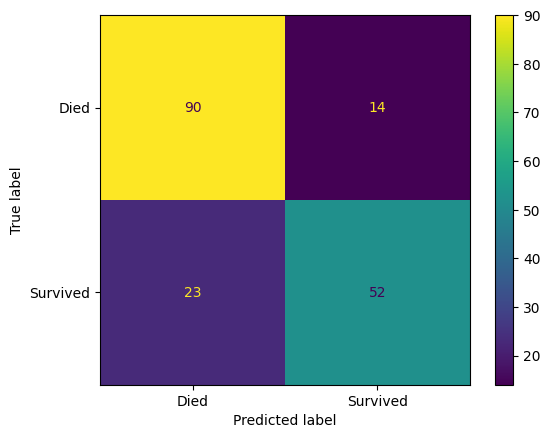

In [30]:
preds=model.predict(x_test)
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm,display_labels=['Died','Survived']).plot()
# plt.show()


In [28]:
print(classification_report(y_test, preds, target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.80      0.87      0.83       104
    Survived       0.79      0.69      0.74        75

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



(array([0.41899441, 0.78787879, 1.        ]), array([1.        , 0.69333333, 0.        ]), array([0, 1]))


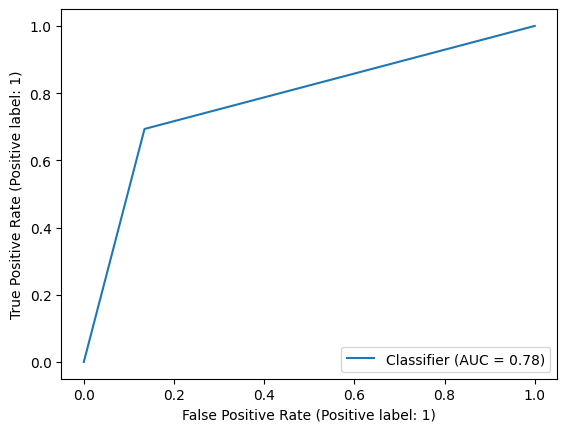

In [37]:
pr = precision_recall_curve(y_test,preds)
print(pr)
RocCurveDisplay.from_predictions(y_test,preds)

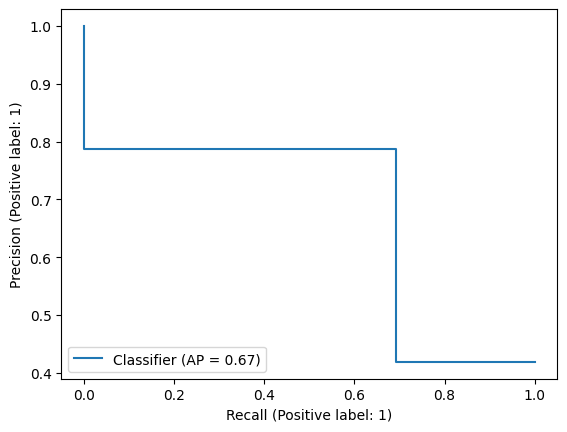

In [38]:
PrecisionRecallDisplay.from_predictions(y_test, preds)